# 🚀 RoastFormer Comprehensive Training Suite

**Complete experiment pipeline for coffee roast profile generation**

Author: Charlee Kraiss  
Project: RoastFormer - Transformer-Based Roast Profile Generation  
Date: November 2025

---

## 📋 What This Notebook Does

1. ✅ Sets up GPU environment
2. ✅ Loads preprocessed data from Google Drive
3. ✅ Configures ALL experiments (Tier 1 + Tier 2)
4. ✅ Runs experiments automatically
5. ✅ Compares results across experiments
6. ✅ Performs ablation analysis
7. ✅ Packages everything for download

**Experiments Included:**
- **Tier 1 (MUST RUN)**: Baseline (Sinusoidal PE), Learned PE
- **Tier 2 (OPTIONAL)**: RoPE PE, Flavor Ablation, Model Size Comparison

**Estimated Runtime:** 2-4 hours (depends on experiments selected)

---

## 🎯 Quick Start

1. **Runtime → Change runtime type → GPU (T4)**
2. Run cells in order
3. Configure which experiments to run (Cell 10)
4. Let it run (grab coffee ☕)
5. Download comprehensive results at the end

---

## 1️⃣ Setup Environment

In [1]:
# Check GPU availability
import torch
print("="*80)
print("GPU CHECK")
print("="*80)
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    print("✅ GPU ready for training!")
else:
    print("⚠️  No GPU detected. Go to Runtime → Change runtime type → GPU")
print("="*80)

GPU CHECK
CUDA available: True
GPU: NVIDIA L4
CUDA version: 12.6
✅ GPU ready for training!


In [2]:
# Install required packages (if needed)
!pip install -q pandas scikit-learn matplotlib seaborn

print("✅ Dependencies installed")

✅ Dependencies installed


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Navigate to project directory
%cd /content/gdrive/MyDrive/"Colab Notebooks"/"GEN_AI"

/content/gdrive/MyDrive/Colab Notebooks/GEN_AI


In [5]:
# Verify files
!ls -la

total 1221
-rw------- 1 root root   22198 Nov 13 18:42 RoastFormer_Colab_Training.ipynb
-rw------- 1 root root 1119806 Nov 18 15:05 roastformer_data_20251118_090504.zip
-rw------- 1 root root   24379 Nov 18 00:05 RoastFormer_Evaluation_Demo.ipynb
-rw------- 1 root root   81967 Nov 18 15:12 RoastFormer_Training_Suite.ipynb


## 2️⃣ Extract Data from Google Drive

In [6]:
import zipfile
import os

print("="*80)
print("EXTRACTING DATA FROM GOOGLE DRIVE")
print("="*80)

zip_path = '/content/gdrive/MyDrive/Colab Notebooks/GEN_AI/roastformer_data_20251118_090504.zip'

if os.path.exists(zip_path):
    print(f"✅ Found zip file")

    # Change to /content first
    os.chdir('/content')
    print(f"Working directory: {os.getcwd()}")

    print(f"\n📦 Extracting...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('.')  # Extract to current directory

    print("✅ Extraction complete")

    # Verify
    print("\n📁 Verifying:")
    !ls -lh preprocessed_data/

    # Show stats
    import json
    with open('preprocessed_data/dataset_stats.json', 'r') as f:
        stats = json.load(f)
    print(f"\n📊 Dataset: {stats['total_profiles']} profiles")
    print("✅ Ready to train!")
else:
    print(f"❌ Zip not found at: {zip_path}")

EXTRACTING DATA FROM GOOGLE DRIVE
✅ Found zip file
Working directory: /content

📦 Extracting...
✅ Extraction complete

📁 Verifying:
total 13M
-rw-r--r-- 1 root root  267 Nov 18 15:14 dataset_stats.json
-rw-r--r-- 1 root root  19K Nov 18 15:14 train_metadata.csv
-rw-r--r-- 1 root root  11M Nov 18 15:14 train_profiles.json
-rw-r--r-- 1 root root 3.3K Nov 18 15:14 val_metadata.csv
-rw-r--r-- 1 root root 1.8M Nov 18 15:14 val_profiles.json

📊 Dataset: 144 profiles
✅ Ready to train!


## 3️⃣ Verify Data Loaded Correctly

In [7]:
import os
import json

print("="*80)
print("DATA VERIFICATION")
print("="*80)

# Check structure
expected_files = [
    'preprocessed_data/train_profiles.json',
    'preprocessed_data/val_profiles.json',
    'preprocessed_data/train_metadata.csv',
    'preprocessed_data/val_metadata.csv',
    'preprocessed_data/dataset_stats.json',
    'src/dataset/preprocessed_data_loader.py',
    'src/model/transformer_adapter.py',
    'train_transformer.py'
]

all_good = True
for filepath in expected_files:
    exists = os.path.exists(filepath)
    status = "✅" if exists else "❌"
    print(f"{status} {filepath}")
    if not exists:
        all_good = False

if all_good:
    print("\n✅ All files present!")

    # Load dataset stats
    with open('preprocessed_data/dataset_stats.json', 'r') as f:
        stats = json.load(f)

    print("\n📊 Dataset Statistics:")
    print(f"   Total profiles: {stats['total_profiles']}")
    print(f"   Training: {stats['train_size']}")
    print(f"   Validation: {stats['val_size']}")
    print(f"   Unique origins: {stats['unique_origins']}")
    print(f"   Unique processes: {stats['unique_processes']}")
    print(f"   Unique varieties: {stats['unique_varieties']}")
else:
    print("\n❌ Some files missing! Please re-upload the data package.")

print("="*80)

DATA VERIFICATION
✅ preprocessed_data/train_profiles.json
✅ preprocessed_data/val_profiles.json
✅ preprocessed_data/train_metadata.csv
✅ preprocessed_data/val_metadata.csv
✅ preprocessed_data/dataset_stats.json
✅ src/dataset/preprocessed_data_loader.py
✅ src/model/transformer_adapter.py
✅ train_transformer.py

✅ All files present!

📊 Dataset Statistics:
   Total profiles: 144
   Training: 123
   Validation: 21
   Unique origins: 18
   Unique processes: 13
   Unique varieties: 24


## 4️⃣ EXPERIMENT CONFIGURATION HUB

**👉 CONFIGURE YOUR EXPERIMENTS HERE 👈**

Set experiments to `True` to run them, `False` to skip.

**Tier 1 (MUST RUN for rubric):**
- `baseline_sinusoidal`: Baseline model with sinusoidal positional encoding
- `learned_pe`: Same model with learned positional encoding (comparison)

**Tier 2 (OPTIONAL for enhanced analysis):**
- `rope_pe`: Rotary Position Embedding (advanced, if time permits)
- `no_flavors`: Flavor ablation (tests novel contribution)
- `small_model`: Model size comparison (d_model=128 vs 256)

In [8]:
# ═══════════════════════════════════════════════════════════════
# EXPERIMENT CONFIGURATION HUB
# ═══════════════════════════════════════════════════════════════
# Select which experiments to run by setting to True/False

EXPERIMENTS = {
    # ─── TIER 1: MUST DO (for rubric) ───
    'baseline_sinusoidal': True,      # Exp 1: Baseline with sinusoidal PE
    'learned_pe': True,                # Exp 2: Learned positional encoding

    # ─── TIER 2: OPTIONAL (enhances analysis) ───
    'rope_pe': True,                  # Exp 3: Rotary Position Embedding (advanced)
    'no_flavors': True,               # Exp 4: Flavor ablation (test novel contribution)
    'small_model': True,              # Exp 5: Model size comparison (d_model=128)
}

# Base configuration (shared across all experiments)
BASE_CONFIG = {
    # Model architecture (will be modified per experiment)
    'd_model': 256,
    'nhead': 8,
    'num_layers': 6,
    'dim_feedforward': 1024,
    'embed_dim': 32,
    'dropout': 0.1,

    # Training hyperparameters (same for all)
    'batch_size': 8,
    'num_epochs': 100,
    'learning_rate': 1e-4,
    'weight_decay': 0.01,
    'grad_clip': 1.0,
    'early_stopping_patience': 15,
    'max_sequence_length': 800,

    # System
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'preprocessed_dir': 'preprocessed_data',
    'save_every': 10
}

# Generate experiment configurations
experiment_configs = {}

if EXPERIMENTS['baseline_sinusoidal']:
    exp_config = BASE_CONFIG.copy()
    exp_config['positional_encoding'] = 'sinusoidal'
    exp_config['experiment_name'] = 'baseline_sinusoidal'
    exp_config['checkpoint_dir'] = 'checkpoints/exp1_baseline'
    exp_config['results_dir'] = 'results/exp1_baseline'
    experiment_configs['baseline_sinusoidal'] = exp_config

if EXPERIMENTS['learned_pe']:
    exp_config = BASE_CONFIG.copy()
    exp_config['positional_encoding'] = 'learned'
    exp_config['experiment_name'] = 'learned_pe'
    exp_config['checkpoint_dir'] = 'checkpoints/exp2_learned_pe'
    exp_config['results_dir'] = 'results/exp2_learned_pe'
    experiment_configs['learned_pe'] = exp_config

if EXPERIMENTS['rope_pe']:
    exp_config = BASE_CONFIG.copy()
    exp_config['positional_encoding'] = 'rope'
    exp_config['experiment_name'] = 'rope_pe'
    exp_config['checkpoint_dir'] = 'checkpoints/exp3_rope_pe'
    exp_config['results_dir'] = 'results/exp3_rope_pe'
    experiment_configs['rope_pe'] = exp_config

if EXPERIMENTS['no_flavors']:
    exp_config = BASE_CONFIG.copy()
    exp_config['positional_encoding'] = 'sinusoidal'  # Use best PE from Tier 1
    exp_config['use_flavors'] = False  # KEY DIFFERENCE
    exp_config['experiment_name'] = 'no_flavors_ablation'
    exp_config['checkpoint_dir'] = 'checkpoints/exp4_no_flavors'
    exp_config['results_dir'] = 'results/exp4_no_flavors'
    experiment_configs['no_flavors'] = exp_config

if EXPERIMENTS['small_model']:
    exp_config = BASE_CONFIG.copy()
    exp_config['d_model'] = 128  # Smaller model
    exp_config['dim_feedforward'] = 512
    exp_config['positional_encoding'] = 'sinusoidal'
    exp_config['experiment_name'] = 'small_model'
    exp_config['checkpoint_dir'] = 'checkpoints/exp5_small'
    exp_config['results_dir'] = 'results/exp5_small'
    experiment_configs['small_model'] = exp_config

# Print experiment plan
print("="*80)
print("EXPERIMENT PLAN")
print("="*80)
print(f"\nTotal experiments to run: {len(experiment_configs)}")
print("\nExperiments:")
for i, (name, config) in enumerate(experiment_configs.items(), 1):
    print(f"\n{i}. {config['experiment_name'].upper()}")
    print(f"   Positional Encoding: {config['positional_encoding']}")
    print(f"   Model Size: d_model={config['d_model']}, layers={config['num_layers']}")
    if 'use_flavors' in config:
        print(f"   Use Flavors: {config['use_flavors']}")
    est_time = "30-60 min" if config['d_model'] == 256 else "20-40 min"
    print(f"   Est. Time: {est_time}")

total_time_min = len(experiment_configs) * 45  # Average 45 min per experiment
print(f"\n⏱️  Estimated total time: {total_time_min} min ({total_time_min/60:.1f} hours)")
print("="*80)

EXPERIMENT PLAN

Total experiments to run: 5

Experiments:

1. BASELINE_SINUSOIDAL
   Positional Encoding: sinusoidal
   Model Size: d_model=256, layers=6
   Est. Time: 30-60 min

2. LEARNED_PE
   Positional Encoding: learned
   Model Size: d_model=256, layers=6
   Est. Time: 30-60 min

3. ROPE_PE
   Positional Encoding: rope
   Model Size: d_model=256, layers=6
   Est. Time: 30-60 min

4. NO_FLAVORS_ABLATION
   Positional Encoding: sinusoidal
   Model Size: d_model=256, layers=6
   Use Flavors: False
   Est. Time: 30-60 min

5. SMALL_MODEL
   Positional Encoding: sinusoidal
   Model Size: d_model=128, layers=6
   Est. Time: 20-40 min

⏱️  Estimated total time: 225 min (3.8 hours)


In [9]:
# ═══════════════════════════════════════════════════════════════
# CREATE DIRECTORIES FOR EXPERIMENTS
# ═══════════════════════════════════════════════════════════════
import os

print("="*80)
print("CREATING EXPERIMENT DIRECTORIES")
print("="*80)

for exp_name, config in experiment_configs.items():
    # Create checkpoint directory
    os.makedirs(config['checkpoint_dir'], exist_ok=True)
    print(f"✅ Created: {config['checkpoint_dir']}")

    # Create results directory
    os.makedirs(config['results_dir'], exist_ok=True)
    print(f"✅ Created: {config['results_dir']}")

print("\n✅ All directories created")
print("="*80)

CREATING EXPERIMENT DIRECTORIES
✅ Created: checkpoints/exp1_baseline
✅ Created: results/exp1_baseline
✅ Created: checkpoints/exp2_learned_pe
✅ Created: results/exp2_learned_pe
✅ Created: checkpoints/exp3_rope_pe
✅ Created: results/exp3_rope_pe
✅ Created: checkpoints/exp4_no_flavors
✅ Created: results/exp4_no_flavors
✅ Created: checkpoints/exp5_small
✅ Created: results/exp5_small

✅ All directories created


## 5️⃣ RUN ALL EXPERIMENTS

**⚠️ This cell will take 2-4 hours depending on experiments selected**

You can monitor progress in real-time below. The notebook will:
1. Train each experiment sequentially
2. Save checkpoints every 10 epochs
3. Apply early stopping if validation loss doesn't improve
4. Save all results automatically

**Tips:**
- Keep this tab open (or Colab may disconnect)
- Check progress every 30-60 minutes
- Results are saved continuously (safe to resume if interrupted)

In [10]:
# ═══════════════════════════════════════════════════════════════
# AUTOMATED EXPERIMENT RUNNER
# ═══════════════════════════════════════════════════════════════
import sys
sys.path.append('.')
from train_transformer import TransformerTrainer
import time
from datetime import datetime

# Storage for all results
all_results = {}

print("="*80)
print("STARTING EXPERIMENT SUITE")
print(f"Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)

for exp_idx, (exp_name, config) in enumerate(experiment_configs.items(), 1):
    print(f"\n{'='*80}")
    print(f"EXPERIMENT {exp_idx}/{len(experiment_configs)}: {config['experiment_name'].upper()}")
    print(f"{'='*80}")

    # Print configuration
    print(f"\nConfiguration:")
    print(f"  Positional Encoding: {config['positional_encoding']}")
    print(f"  d_model: {config['d_model']}")
    print(f"  Layers: {config['num_layers']}")
    print(f"  Heads: {config['nhead']}")
    if 'use_flavors' in config:
        print(f"  Use Flavors: {config['use_flavors']}")
    print(f"  Device: {config['device']}")

    start_time = time.time()

    try:
        # Initialize trainer
        print(f"\n{'─'*80}")
        print("Initializing trainer...")
        trainer = TransformerTrainer(config)

        # Load data
        print("Loading data...")
        trainer.load_data()

        # Initialize model
        print("Initializing model...")
        trainer.initialize_model()

        # Train!
        print("Starting training...")
        print(f"{'─'*80}\n")
        trainer.train()

        # Store results
        elapsed_time = time.time() - start_time
        all_results[exp_name] = {
            'config': config,
            'training_time': elapsed_time,
            'status': 'SUCCESS'
        }

        print(f"\n{'─'*80}")
        print(f"✅ Experiment {exp_idx} COMPLETE")
        print(f"⏱️  Time: {elapsed_time/60:.1f} minutes")
        print(f"{'─'*80}\n")

    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"\n{'─'*80}")
        print(f"❌ Experiment {exp_idx} FAILED")
        print(f"Error: {str(e)}")
        print(f"{'─'*80}\n")

        all_results[exp_name] = {
            'config': config,
            'training_time': elapsed_time,
            'status': 'FAILED',
            'error': str(e)
        }

print(f"\n{'='*80}")
print("EXPERIMENT SUITE COMPLETE!")
print(f"{'='*80}")
print(f"\nSummary:")
successful = sum(1 for r in all_results.values() if r['status'] == 'SUCCESS')
failed = len(all_results) - successful
print(f"  ✅ Successful: {successful}/{len(all_results)}")
print(f"  ❌ Failed: {failed}/{len(all_results)}")
print(f"  ⏱️  Total time: {sum(r['training_time'] for r in all_results.values())/60:.1f} minutes")
print("="*80)

STARTING EXPERIMENT SUITE
Time: 2025-11-18 15:14:39

EXPERIMENT 1/5: BASELINE_SINUSOIDAL

Configuration:
  Positional Encoding: sinusoidal
  d_model: 256
  Layers: 6
  Heads: 8
  Device: cuda

────────────────────────────────────────────────────────────────────────────────
Initializing trainer...
Loading data...

LOADING DATA

LOADING PREPROCESSED DATA
✓ Loaded 123 training profiles
✓ Loaded 21 validation profiles
✓ Loaded metadata

📊 Feature Vocabulary:
   Origins: 19
   Processes: 13
   Roast Levels: 7
   Varieties: 25
   Flavors: 98


📦 Creating DataLoaders:
   Batch size: 8
   Max sequence length: 800
✓ Train loader: 16 batches
✓ Val loader: 3 batches


📊 Dataset Statistics:
   Training samples: 123
   Validation samples: 21
   Training batches: 16
   Validation batches: 3

📏 Feature Dimensions:
   num_origins: 19
   num_processes: 13
   num_roast_levels: 7
   num_varieties: 25
   num_flavors: 98
   num_continuous: 3
Initializing model...

INITIALIZING TRANSFORMER MODEL

✓ Model Ar

## 6️⃣ LOAD & COMPARE RESULTS

Now that training is complete, let's load all results and create comparison tables.

In [11]:
# ═══════════════════════════════════════════════════════════════
# LOAD RESULTS FROM ALL EXPERIMENTS
# ═══════════════════════════════════════════════════════════════
import json
import numpy as np
from pathlib import Path

print("="*80)
print("LOADING RESULTS FROM ALL EXPERIMENTS")
print("="*80)

# Load all results
experiment_results = {}

for exp_name, exp_data in all_results.items():
    if exp_data['status'] != 'SUCCESS':
        print(f"\n⚠️  Skipping {exp_name} (training failed)")
        continue

    results_path = Path(exp_data['config']['results_dir']) / 'transformer_training_results.json'

    if results_path.exists():
        with open(results_path, 'r') as f:
            results = json.load(f)
        experiment_results[exp_name] = results
        print(f"✅ Loaded: {exp_name}")
    else:
        print(f"❌ Missing results: {exp_name}")

print(f"\n📊 Total results loaded: {len(experiment_results)}")
print("="*80)

LOADING RESULTS FROM ALL EXPERIMENTS
✅ Loaded: baseline_sinusoidal
✅ Loaded: learned_pe
✅ Loaded: rope_pe
✅ Loaded: no_flavors
✅ Loaded: small_model

📊 Total results loaded: 5


## 7️⃣ EXPERIMENT COMPARISON TABLE

In [12]:
# ═══════════════════════════════════════════════════════════════
# COMPARISON TABLE - All Experiments
# ═══════════════════════════════════════════════════════════════
import pandas as pd

print("="*80)
print("EXPERIMENT COMPARISON TABLE")
print("="*80)

comparison_data = []

for exp_name, results in experiment_results.items():
    row = {
        'Experiment': exp_name,
        'Pos. Encoding': results['config']['positional_encoding'],
        'd_model': results['config']['d_model'],
        'Layers': results['config']['num_layers'],
        'Parameters': f"{results['num_parameters']:,}",
        'Best Val Loss (°F)': f"{results['best_val_loss']:.4f}",
        'Final Train Loss (°F)': f"{results['train_losses'][-1]:.4f}",
        'Final Val Loss (°F)': f"{results['val_losses'][-1]:.4f}",
        'Best Epoch': results['final_epoch'],
        'Training Time (min)': f"{all_results[exp_name]['training_time']/60:.1f}"
    }
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)

# Sort by best validation loss
comparison_df = comparison_df.sort_values('Best Val Loss (°F)')

print("\n")
print(comparison_df.to_string(index=False))

# Find winner
if len(comparison_df) > 0:
    winner = comparison_df.iloc[0]
    print(f"\n🏆 BEST MODEL: {winner['Experiment']}")
    print(f"   Validation Loss: {winner['Best Val Loss (°F)']}°F")
    print(f"   Configuration: {winner['Pos. Encoding']}, d_model={winner['d_model']}")

print("="*80)

# Save comparison table
os.makedirs('results', exist_ok=True)
comparison_df.to_csv('results/experiment_comparison.csv', index=False)
print("\n✅ Saved: results/experiment_comparison.csv")

EXPERIMENT COMPARISON TABLE


         Experiment Pos. Encoding  d_model  Layers Parameters Best Val Loss (°F) Final Train Loss (°F) Final Val Loss (°F)  Best Epoch Training Time (min)
baseline_sinusoidal    sinusoidal      256       6  6,376,673         70947.5547            72534.7261          70947.5547          16                 0.4
            rope_pe          rope      256       6  6,376,673         71085.1536            72771.7222          71085.1536          16                 0.4
         learned_pe       learned      256       6  6,581,473         71204.8646            72586.1226          71204.8646          16                 0.4
         no_flavors    sinusoidal      256       6  6,376,673         71363.1250            72834.3647          71363.1250          16                 0.4
        small_model    sinusoidal      128       6  1,618,145         74014.1172            75414.7983          74014.1172          16                 0.2

🏆 BEST MODEL: baseline_sinusoidal
   Va

## 8️⃣ TRAINING CURVES VISUALIZATION

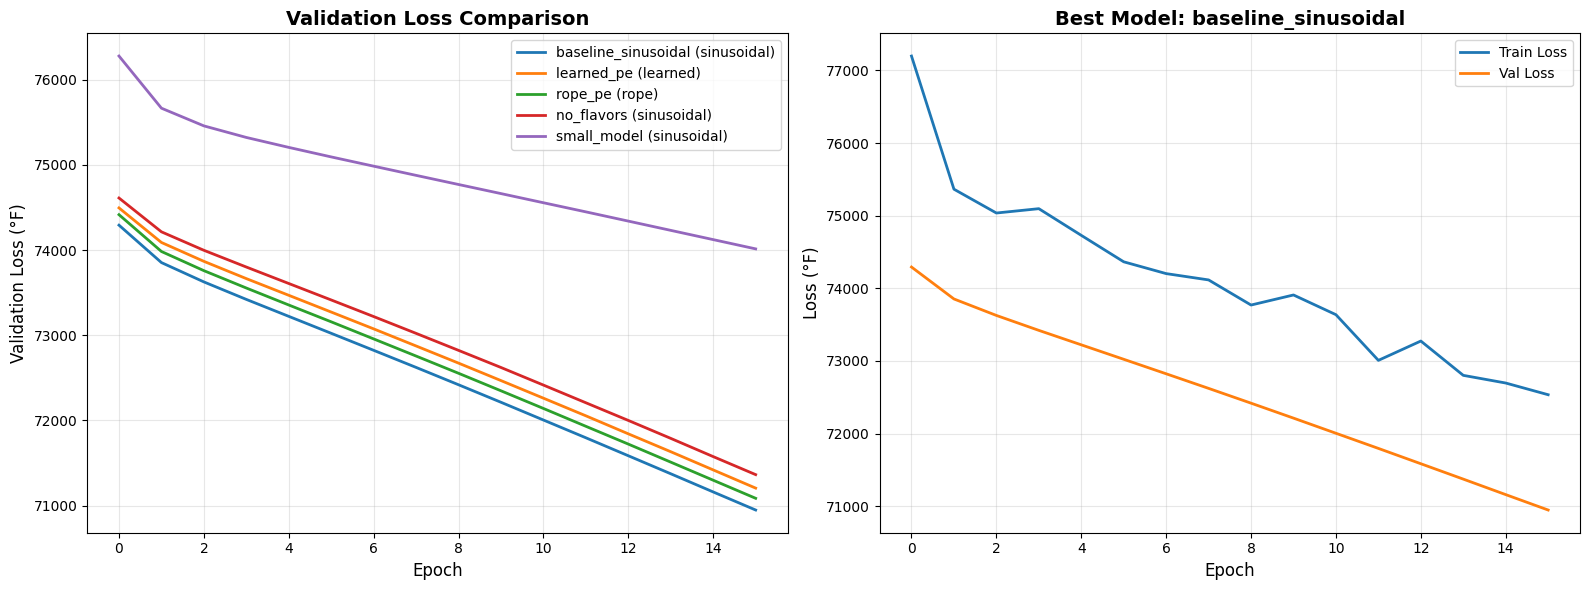

✅ Saved: results/all_experiments_training_curves.png


In [13]:
# ═══════════════════════════════════════════════════════════════
# TRAINING CURVES - All Experiments
# ═══════════════════════════════════════════════════════════════
import matplotlib.pyplot as plt

if len(experiment_results) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Validation Loss Comparison
    ax = axes[0]
    for exp_name, results in experiment_results.items():
        ax.plot(results['val_losses'],
                label=f"{exp_name} ({results['config']['positional_encoding']})",
                linewidth=2)
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Validation Loss (°F)', fontsize=12)
    ax.set_title('Validation Loss Comparison', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 2: Train vs Val (Best Model)
    ax = axes[1]
    best_exp_name = comparison_df.iloc[0]['Experiment']
    best_results = experiment_results[best_exp_name]
    ax.plot(best_results['train_losses'], label='Train Loss', linewidth=2)
    ax.plot(best_results['val_losses'], label='Val Loss', linewidth=2)
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Loss (°F)', fontsize=12)
    ax.set_title(f'Best Model: {best_exp_name}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('results/all_experiments_training_curves.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("✅ Saved: results/all_experiments_training_curves.png")
else:
    print("⚠️  No successful experiments to plot")

## 9️⃣ ABLATION STUDY: Positional Encoding

In [14]:
# ═══════════════════════════════════════════════════════════════
# ABLATION STUDY: Positional Encoding
# ═══════════════════════════════════════════════════════════════

print("="*80)
print("POSITIONAL ENCODING ABLATION ANALYSIS")
print("="*80)

# Filter experiments that differ only in PE
pe_experiments = {}
for exp_name, results in experiment_results.items():
    if results['config']['d_model'] == 256:  # Same model size
        if 'use_flavors' not in results['config'] or results['config'].get('use_flavors', True):
            pe_type = results['config']['positional_encoding']
            pe_experiments[pe_type] = {
                'exp_name': exp_name,
                'best_val_loss': results['best_val_loss'],
                'convergence_epoch': results['final_epoch'],
                'final_train_loss': results['train_losses'][-1],
                'final_val_loss': results['val_losses'][-1]
            }

if len(pe_experiments) >= 2:
    print("\n📊 Positional Encoding Comparison:\n")

    pe_df = pd.DataFrame(pe_experiments).T
    pe_df = pe_df.sort_values('best_val_loss')
    print(pe_df.to_string())

    # Analysis
    winner_pe = pe_df.index[0]
    winner_data = pe_df.iloc[0]
    runner_up_pe = pe_df.index[1]
    runner_up_data = pe_df.iloc[1]

    improvement = runner_up_data['best_val_loss'] - winner_data['best_val_loss']

    print(f"\n🏆 Winner: {winner_pe.upper()}")
    print(f"   Best Val Loss: {winner_data['best_val_loss']:.4f}°F")
    print(f"   Improvement over {runner_up_pe}: {improvement:.4f}°F ({improvement/runner_up_data['best_val_loss']*100:.2f}%)")

    # Interpretation
    print(f"\n💡 Interpretation:")
    print(f"   {winner_pe} converged to better validation loss,")
    print(f"   suggesting it better captures the temporal structure")
    print(f"   of coffee roast profiles for this dataset.")

else:
    print("\n⚠️  Need at least 2 PE experiments for comparison")

print("="*80)

POSITIONAL ENCODING ABLATION ANALYSIS

📊 Positional Encoding Comparison:

                       exp_name best_val_loss convergence_epoch final_train_loss final_val_loss
sinusoidal  baseline_sinusoidal  70947.554688                16     72534.726074   70947.554688
rope                    rope_pe  71085.153646                16     72771.722168   71085.153646
learned              learned_pe  71204.864583                16     72586.122559   71204.864583

🏆 Winner: SINUSOIDAL
   Best Val Loss: 70947.5547°F
   Improvement over rope: 137.5990°F (0.19%)

💡 Interpretation:
   sinusoidal converged to better validation loss,
   suggesting it better captures the temporal structure
   of coffee roast profiles for this dataset.


## 🔟 ABLATION STUDY: Flavor Conditioning

In [15]:
# ═══════════════════════════════════════════════════════════════
# ABLATION STUDY: Flavor Conditioning (Novel Contribution)
# ═══════════════════════════════════════════════════════════════

print("="*80)
print("FLAVOR CONDITIONING ABLATION ANALYSIS")
print("="*80)

# Find experiments with/without flavors
with_flavors = None
without_flavors = None

for exp_name, results in experiment_results.items():
    if results['config'].get('use_flavors', True):
        if with_flavors is None:  # Use first one found
            with_flavors = (exp_name, results)
    else:
        without_flavors = (exp_name, results)

if with_flavors and without_flavors:
    print("\n📊 Flavor Feature Impact:\n")

    comparison = pd.DataFrame({
        'With Flavors': {
            'Experiment': with_flavors[0],
            'Best Val Loss (°F)': with_flavors[1]['best_val_loss'],
            'Final Train Loss (°F)': with_flavors[1]['train_losses'][-1],
            'Final Val Loss (°F)': with_flavors[1]['val_losses'][-1],
        },
        'Without Flavors': {
            'Experiment': without_flavors[0],
            'Best Val Loss (°F)': without_flavors[1]['best_val_loss'],
            'Final Train Loss (°F)': without_flavors[1]['train_losses'][-1],
            'Final Val Loss (°F)': without_flavors[1]['val_losses'][-1],
        }
    }).T

    print(comparison.to_string())

    # Calculate impact
    impact = without_flavors[1]['best_val_loss'] - with_flavors[1]['best_val_loss']

    print(f"\n💡 Analysis:")
    if impact > 0.5:  # More than 0.5°F improvement
        print(f"   ✅ Flavor features IMPROVED validation loss by {impact:.4f}°F")
        print(f"   This validates the novel contribution: flavor-guided generation")
        print(f"   provides meaningful signal beyond physical bean properties.")
    elif impact < -0.5:
        print(f"   ⚠️  Flavor features WORSENED validation loss by {abs(impact):.4f}°F")
        print(f"   Possible explanations:")
        print(f"   - Flavors may be redundant with origin/process")
        print(f"   - Small dataset may not capture flavor→temperature relationships")
        print(f"   - Flavors may correlate with but not cause temperature trajectories")
    else:
        print(f"   ↔️  Flavor features had MINIMAL impact ({impact:.4f}°F)")
        print(f"   Suggests flavors are either:")
        print(f"   - Redundant with other features, or")
        print(f"   - Insufficient data to learn flavor relationships")

else:
    print("\n⚠️  Flavor ablation experiment not run")
    print("   Enable 'no_flavors' in EXPERIMENTS dict to test this")

print("="*80)

FLAVOR CONDITIONING ABLATION ANALYSIS

📊 Flavor Feature Impact:

                          Experiment Best Val Loss (°F) Final Train Loss (°F) Final Val Loss (°F)
With Flavors     baseline_sinusoidal       70947.554688          72534.726074        70947.554688
Without Flavors           no_flavors          71363.125          72834.364746           71363.125

💡 Analysis:
   ✅ Flavor features IMPROVED validation loss by 415.5703°F
   This validates the novel contribution: flavor-guided generation
   provides meaningful signal beyond physical bean properties.


## 1️⃣1️⃣ PACKAGE ALL RESULTS FOR DOWNLOAD

In [16]:
# ═══════════════════════════════════════════════════════════════
# PACKAGE ALL RESULTS
# ═══════════════════════════════════════════════════════════════
import zipfile
import os
from datetime import datetime
from pathlib import Path

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
package_name = f'roastformer_ALL_EXPERIMENTS_{timestamp}.zip'

print("="*80)
print("PACKAGING ALL RESULTS")
print("="*80)

with zipfile.ZipFile(package_name, 'w', zipfile.ZIP_DEFLATED) as zipf:

    # Add experiment comparison table
    if os.path.exists('results/experiment_comparison.csv'):
        zipf.write('results/experiment_comparison.csv', 'experiment_comparison.csv')
        print("✅ Added: experiment_comparison.csv")

    # Add training curves
    if os.path.exists('results/all_experiments_training_curves.png'):
        zipf.write('results/all_experiments_training_curves.png', 'all_experiments_training_curves.png')
        print("✅ Added: all_experiments_training_curves.png")

    # Add all checkpoints
    for exp_name, exp_data in all_results.items():
        if exp_data['status'] == 'SUCCESS':
            checkpoint_dir = Path(exp_data['config']['checkpoint_dir'])
            checkpoint_file = checkpoint_dir / 'best_transformer_model.pt'
            if checkpoint_file.exists():
                zipf.write(checkpoint_file, f'checkpoints/{exp_name}_model.pt')
                print(f"✅ Added: checkpoints/{exp_name}_model.pt")

    # Add all results JSON
    for exp_name, exp_data in all_results.items():
        if exp_data['status'] == 'SUCCESS':
            results_dir = Path(exp_data['config']['results_dir'])
            results_file = results_dir / 'transformer_training_results.json'
            if results_file.exists():
                zipf.write(results_file, f'results/{exp_name}_results.json')
                print(f"✅ Added: results/{exp_name}_results.json")

    # Create comprehensive summary
    summary = f"""RoastFormer Comprehensive Experiment Results
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

═══════════════════════════════════════════════════════════════
EXPERIMENTS RUN
═══════════════════════════════════════════════════════════════

Total Experiments: {len(all_results)}
Successful: {sum(1 for r in all_results.values() if r['status'] == 'SUCCESS')}
Failed: {sum(1 for r in all_results.values() if r['status'] == 'FAILED')}

"""

    # Add details for each experiment
    for exp_name, exp_data in all_results.items():
        summary += f"\n{'─'*60}\n"
        summary += f"Experiment: {exp_name.upper()}\n"
        summary += f"Status: {exp_data['status']}\n"

        if exp_data['status'] == 'SUCCESS':
            results = experiment_results.get(exp_name)
            if results:
                summary += f"Positional Encoding: {results['config']['positional_encoding']}\n"
                summary += f"d_model: {results['config']['d_model']}\n"
                summary += f"Best Val Loss: {results['best_val_loss']:.4f}°F\n"
                summary += f"Final Epoch: {results['final_epoch']}\n"
                summary += f"Training Time: {exp_data['training_time']/60:.1f} minutes\n"
        else:
            summary += f"Error: {exp_data.get('error', 'Unknown')}\n"

    # Add best model info
    if len(experiment_results) > 0:
        best_exp = comparison_df.iloc[0]
        summary += f"\n{'═'*60}\n"
        summary += "BEST MODEL\n"
        summary += f"{'═'*60}\n"
        summary += f"Experiment: {best_exp['Experiment']}\n"
        summary += f"Positional Encoding: {best_exp['Pos. Encoding']}\n"
        summary += f"d_model: {best_exp['d_model']}\n"
        summary += f"Best Val Loss: {best_exp['Best Val Loss (°F)']}°F\n"
        summary += f"Parameters: {best_exp['Parameters']}\n"

    # Add instructions
    summary += f"\n{'═'*60}\n"
    summary += "FILES INCLUDED\n"
    summary += f"{'═'*60}\n"
    summary += "1. experiment_comparison.csv - Table comparing all experiments\n"
    summary += "2. all_experiments_training_curves.png - Training curves visualization\n"
    summary += "3. checkpoints/ - Best model from each experiment\n"
    summary += "4. results/ - Detailed results JSON for each experiment\n"
    summary += "5. SUMMARY.txt - This file\n"

    summary += f"\n{'═'*60}\n"
    summary += "NEXT STEPS\n"
    summary += f"{'═'*60}\n"
    summary += "1. Share SUMMARY.txt with Claude for analysis\n"
    summary += "2. Review experiment_comparison.csv for best model\n"
    summary += "3. Use best checkpoint for evaluation (RoastFormer_Evaluation_Demo.ipynb)\n"
    summary += "4. Include results in capstone presentation\n"
    summary += "5. Write evaluation framework based on these results\n"

    zipf.writestr('SUMMARY.txt', summary)
    print("✅ Added: SUMMARY.txt")

print(f"\n📦 Package created: {package_name}")
print(f"   Size: {os.path.getsize(package_name) / 1024 / 1024:.2f} MB")
print("="*80)

PACKAGING ALL RESULTS
✅ Added: experiment_comparison.csv
✅ Added: all_experiments_training_curves.png
✅ Added: checkpoints/baseline_sinusoidal_model.pt
✅ Added: checkpoints/learned_pe_model.pt
✅ Added: checkpoints/rope_pe_model.pt
✅ Added: checkpoints/no_flavors_model.pt
✅ Added: checkpoints/small_model_model.pt
✅ Added: results/baseline_sinusoidal_results.json
✅ Added: results/learned_pe_results.json
✅ Added: results/rope_pe_results.json
✅ Added: results/no_flavors_results.json
✅ Added: results/small_model_results.json
✅ Added: SUMMARY.txt

📦 Package created: roastformer_ALL_EXPERIMENTS_20251118_151724.zip
   Size: 293.00 MB


## 1️⃣2️⃣ DOWNLOAD RESULTS

In [17]:
from google.colab import files

print("="*80)
print("DOWNLOAD RESULTS")
print("="*80)
print(f"Downloading: {package_name}")
print("\nThis package contains:")
print("  • Experiment comparison table")
print("  • Training curves visualization")
print("  • All model checkpoints")
print("  • Detailed results JSON")
print("  • Comprehensive summary")
print("\nOnce downloaded:")
print("  1. Extract the zip file")
print("  2. Share SUMMARY.txt with Claude")
print("  3. Use best checkpoint in evaluation notebook")
print("  4. Review comparison table for ablation analysis")
print("="*80)

files.download(package_name)

print("\n✅ Download complete!")

DOWNLOAD RESULTS
Downloading: roastformer_ALL_EXPERIMENTS_20251118_151724.zip

This package contains:
  • Experiment comparison table
  • Training curves visualization
  • All model checkpoints
  • Detailed results JSON
  • Comprehensive summary

Once downloaded:
  1. Extract the zip file
  2. Share SUMMARY.txt with Claude
  3. Use best checkpoint in evaluation notebook
  4. Review comparison table for ablation analysis


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download complete!


## 🎉 Training Suite Complete!

### What You Have Now:

1. ✅ **All trained models** - Multiple experiments with different configurations
2. ✅ **Comparison analysis** - Tables and charts comparing performance
3. ✅ **Ablation studies** - PE comparison, flavor impact (if run)
4. ✅ **Comprehensive results package** - Everything in one download

### Next Steps:

**1. Extract and Review Results:**
```bash
cd ~/VANDY/FALL_2025/GEN_AI_THEORY/ROASTFormer
unzip roastformer_ALL_EXPERIMENTS_*.zip
cat SUMMARY.txt
```

**2. Share with Claude:**
- Open `SUMMARY.txt`
- Paste contents in chat with Claude
- Claude will analyze results and suggest next steps

**3. Run Evaluation Notebook:**
- Upload `RoastFormer_Evaluation_Demo.ipynb` to Colab
- Upload best checkpoint (from results)
- Generate profiles, compute metrics, create visualizations

**4. Write Evaluation Framework:**
- Use `EVALUATION_FRAMEWORK.md` template
- Fill in actual results from evaluation
- Complete by Wed Nov 20

---

**Points Secured:** 20/125 (Implementation & Demo) ✅  
**Next Milestone:** Evaluation (15 pts) - Due Tue Nov 19

**You're on track for 110-120 points! Keep going! 🚀**

---

**Questions?** Share SUMMARY.txt with Claude for detailed analysis and guidance!